# Deep Learning Fundamentals - Part 1

## Colab environment

In [1]:
!python --version

Python 3.6.9


In [2]:
!pip list | grep tensor

tensorboard                   2.4.1          
tensorboard-plugin-wit        1.8.0          
tensorflow                    2.4.1          
tensorflow-datasets           4.0.1          
tensorflow-estimator          2.4.0          
tensorflow-gcs-config         2.4.0          
tensorflow-hub                0.11.0         
tensorflow-metadata           0.27.0         
tensorflow-probability        0.12.1         


In [3]:
!pip list | grep torch

torch                         1.7.0+cu101    
torchsummary                  1.5.1          
torchtext                     0.3.1          
torchvision                   0.8.1+cu101    


In [4]:
!nvidia-smi

# It's okay to run this notebook without a GPU!

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



## Basic numerical computing

In [5]:
import numpy as np

# Initialize a numpy ndarray with 3 rows, 2 columns
X = np.zeros((3, 2))
X

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [6]:
# By default, ndarrays are float64
X.shape, X.dtype

((3, 2), dtype('float64'))

In [8]:
# We can set values of a whole row
X[0, :] = 1
X

array([[1., 1.],
       [0., 0.],
       [0., 0.]])

In [9]:
# We can set values of a whole column
X[:, 0] = 2
X

array([[2., 1.],
       [2., 0.],
       [2., 0.]])

In [10]:
X = np.array([
  [1, 2],
  [3, 4],
  [5, 6]
])
X

array([[1, 2],
       [3, 4],
       [5, 6]])

In [11]:
x = np.array([10, 20])
print(x)
print(X.shape, x.shape)

# We can add ndarrays of different dimensions
X + x

[10 20]
(3, 2) (2,)


array([[11, 22],
       [13, 24],
       [15, 26]])

In [12]:
X.shape, x.shape

((3, 2), (2,))

In [13]:
# Element-wise multiplication

X * x

array([[ 10,  40],
       [ 30,  80],
       [ 50, 120]])

In [14]:
# Matrix multiplication
# http://matrixmultiplication.xyz/

x = np.array([[10, 20],]).T
result = X @ x  # alternatively, np.dot(X, x)
result

array([[ 50],
       [110],
       [170]])

### Indexing

In [15]:
X = np.random.rand(3, 2)
X

array([[0.25359387, 0.65894042],
       [0.05840389, 0.76016137],
       [0.930125  , 0.4948833 ]])

In [16]:
X > 0.5

array([[False,  True],
       [False,  True],
       [ True, False]])

In [17]:
X[X > 0.5] = 1
X

array([[0.25359387, 1.        ],
       [0.05840389, 1.        ],
       [1.        , 0.4948833 ]])

## Basic plotting

In [18]:
import matplotlib.pyplot as plt
plt.set_cmap('gray')

<Figure size 432x288 with 0 Axes>

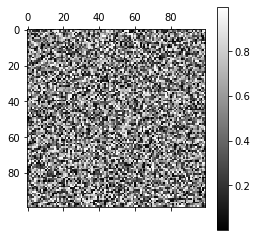

In [19]:
X = np.random.rand(100, 100)
plt.matshow(X)
plt.colorbar()

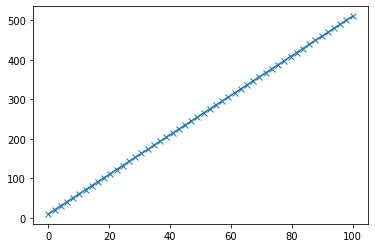

In [20]:
x = np.linspace(0, 100)
y = x * 5 + 10
# y = x * w + b

plt.plot(x, y, 'x-')

## Basic regression with a linear model

x: (50, 1), weights: (1, 1), bias: (1,), y: (50, 1)


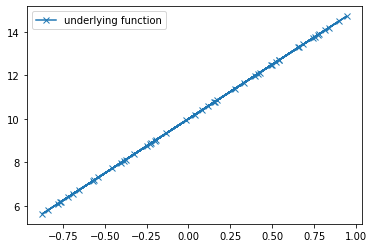

In [21]:
# x is 1-dimensional

n = 50

d = 1
x = np.random.uniform(-1, 1, (n, d))

# y = 5x + 10
weights_true = np.array([[5],])
bias_true = np.array([10])

y_true = x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

plt.plot(x, y_true, marker='x', label='underlying function')
plt.legend()

### Basic prediction function: Linear

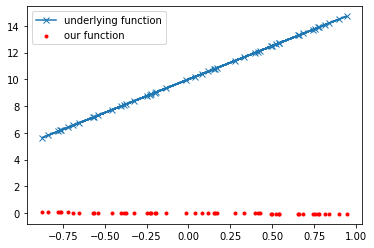

In [22]:
# Let's initialize our predictions

class Linear:
  def __init__(self, input_dim, num_hidden=1):
    # The initialization is important to properly deal with different
    # input sizes (otherwise gradients quickly go to 0).
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)
  
  def __call__(self, x):
    return x @ self.weights + self.bias

linear = Linear(d)
y_pred = linear(x)
plt.plot(x, y_true, marker='x', label='underlying function')
plt.scatter(x, y_pred, color='r', marker='.', label='our function')
plt.legend()

### Basic loss function: MSE


In [23]:
# How wrong are these initial predictions, exactly?
# It's up to us, and our definition is called the loss function.
# Let's use Mean Squared Error (MSE) as our loss function.

class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_true - y_pred) ** 2).mean()
  
loss = MSE()
print(f'Our initial loss is {loss(y_pred, y_true)}')

Our initial loss is 113.52699920131725


### Add back propagation

In [24]:
# Let's use gradient descent to learn the weights and bias that minimizes the loss function.
# For this, we need the gradient of the loss function and the gradients of the linear function.

class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true) ** 2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    # print('MSE backward', self.y_pred.shape, self.y_true.shape, self.gradient.shape)
    return self.gradient


class Linear:
  def __init__(self, input_dim: int, num_hidden: int = 1):
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)
  
  def __call__(self, x):
    self.x = x
    output = x @ self.weights + self.bias
    # print('Linear forward', x.shape, self.weights.shape, output.shape)
    return output

  # y = w*x + b
  # dy/dx = w
  # dy/dw = x
  # dy/db = 1

  def backward(self, gradient):
    # print('Linear backward', gradient.shape, self.x.shape, self.weights.shape, self.bias.shape)
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = gradient @ self.weights.T
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

In [25]:
# Take one step forward and one step backward to make sure nothing breaks, and that the loss decreases.
loss = MSE()
linear = Linear(d)
y_pred = linear(x)
print(loss(y_pred, y_true))
loss_gradient = loss.backward()
linear.backward(loss_gradient)
linear.update(0.1)
y_pred = linear(x)
print(loss(y_pred, y_true))

127.15856540336019
84.77023469703097


### Train using gradient descent!

Epoch 0, loss 116.5458563470355
Epoch 5, loss 15.544026064949437
Epoch 10, loss 3.3394176138986484
Epoch 15, loss 1.2550851438234054
Epoch 20, loss 0.6134351060879445
Epoch 25, loss 0.32117685635270965
Epoch 30, loss 0.17063312728723318
Epoch 35, loss 0.0909206725901456


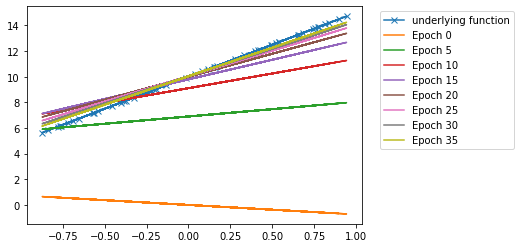

In [26]:
plt.plot(x, y_true, marker='x', label='underlying function')

loss = MSE()
linear = Linear(d)

num_epochs = 40
lr = 0.1

for epoch in range(num_epochs):
  y_pred = linear(x)
  loss_value = loss(y_pred, y_true)

  if epoch % 5 == 0:
    print(f'Epoch {epoch}, loss {loss_value}')
    plt.plot(x, y_pred.squeeze(), label=f'Epoch {epoch}')

  gradient_from_loss = loss.backward()
  linear.backward(gradient_from_loss)
  linear.update(lr)

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left");

### 2-dimensional inputs work, too

(100, 2) (2, 1) (1,)
x: (100, 2), weights: (2, 1), bias: (1,), y: (100, 1)


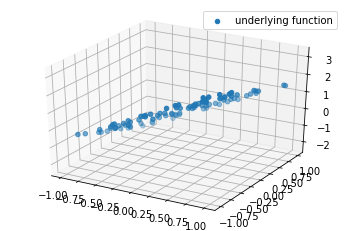

In [27]:
# What about 2-dimensional x?

n = 100
d = 2
x = np.random.uniform(-1, 1, (n, d))

# y = w * x + b
# y = w_0 * x_0 + w_1 * x_1 + b
# y = w@x + b

weights_true = np.array([[2, -1], ]).T
bias_true = np.array([0.5])
print(x.shape, weights_true.shape, bias_true.shape)

y_true = x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
  plt.legend()

plot_3d(x, y_true)

1.5653781365388033


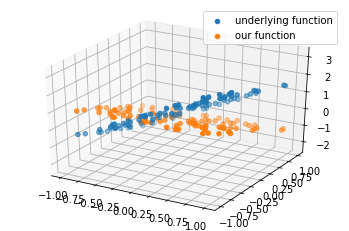

In [28]:
loss = MSE()
linear = Linear(2)
y_pred = linear(x)
print(loss(y_pred, y_true))
fig = plot_3d(x, y_true, y_pred)

Epoch 0, loss 1.5653781365388033
Epoch 1, loss 1.3020635312792168
Epoch 2, loss 1.0945413041932561
Epoch 3, loss 0.9277806408840589
Epoch 4, loss 0.7915113539160117
Epoch 5, loss 0.6785920802734714
Epoch 6, loss 0.5839562034909046
Epoch 7, loss 0.5039284415186778
Epoch 8, loss 0.43577958675296313
Epoch 9, loss 0.37743454832676976
Epoch 10, loss 0.32727932822875355
Epoch 11, loss 0.2840320610493241
Epoch 12, loss 0.2466557240123904
Epoch 13, loss 0.21429811161471363
Epoch 14, loss 0.1862497861497283
Epoch 15, loss 0.1619139961867985
Epoch 16, loss 0.14078466105614648
Epoch 17, loss 0.1224298733751077
Epoch 18, loss 0.10647924400874262
Epoch 19, loss 0.09261397750476283


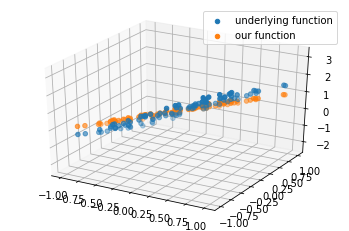

In [29]:
from typing import Callable

def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)

fit(x, y_true, model=linear, loss=loss, lr=0.1, num_epochs=20)
plot_3d(x, y_true, linear(x))

## Basic regression with a Multi-layer Perceptron

So, we now have a way to automatically fit a linear function to N-dimensional data.

How can this be made to work for non-linear data?

x: (200, 2), weights: (2, 1), bias: (1,), y: (200, 1)


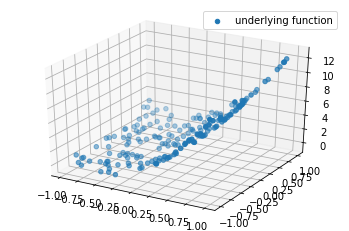

In [30]:
# Make non-linear data

n = 200
d = 2
x = np.random.uniform(-1, 1, (n, d))

weights_true = np.array([[5, 1],]).T
bias_true = np.array([1])

y_true = (x ** 2) @ weights_true + x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

plot_3d(x, y_true)

Epoch 0, loss 21.451404846706748
Epoch 1, loss 17.26396123877619
Epoch 2, loss 14.244915459116823
Epoch 3, loss 12.013808317599072
Epoch 4, loss 10.32311085541992
Epoch 5, loss 9.010491851726453
Epoch 6, loss 7.968395945033212
Epoch 7, loss 7.124632449370398
Epoch 8, loss 6.429970523383816
Epoch 9, loss 5.850195101122489
Epoch 10, loss 5.361005018210115
Epoch 11, loss 4.944723924497697
Epoch 12, loss 4.588169039742132
Epoch 13, loss 4.281260847656174
Epoch 14, loss 4.016108165871678
Epoch 15, loss 3.786399274083239
Epoch 16, loss 3.586991008835852
Epoch 17, loss 3.4136267001665757
Epoch 18, loss 3.262738640637492
Epoch 19, loss 3.1313065939145646
Epoch 20, loss 3.0167539427866616
Epoch 21, loss 2.916869526936145
Epoch 22, loss 2.829747352140067
Epoch 23, loss 2.753739006287251
Epoch 24, loss 2.6874153287738203
Epoch 25, loss 2.629534988964262
Epoch 26, loss 2.579018353214012
Epoch 27, loss 2.534925496507236
Epoch 28, loss 2.4964375321021812
Epoch 29, loss 2.462840646900048
Epoch 30, lo

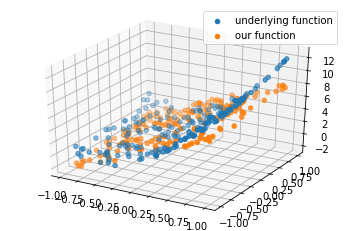

In [31]:
# We can train just fine, but the final loss will remain high, as our linear function is incapable
# of representing the data.

loss = MSE()
linear = Linear(d)
fit(x, y_true, model=linear, loss=loss, lr=0.1, num_epochs=40)
plot_3d(x, y_true, linear(x))

### Add non-linearity: ReLU

In [32]:
# In order to learn non-linear functions, we need non-linearities in our model.

class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_, 0, None)
        return self.output
    
    def backward(self, output_gradient):
      # import pdb; pdb.set_trace()  # By the way, this is how you can debug
      self.input_gradient = (self.input_ > 0) * output_gradient
      return self.input_gradient


relu = Relu()
input_ = np.expand_dims(np.array([1, 0.5, 0, -0.5, -1]), -1)
print(relu(input_))
print(relu.backward(input_))

[[1. ]
 [0.5]
 [0. ]
 [0. ]
 [0. ]]
[[ 1. ]
 [ 0.5]
 [ 0. ]
 [-0. ]
 [-0. ]]


### Train our new non-linear model

18.47049597796476


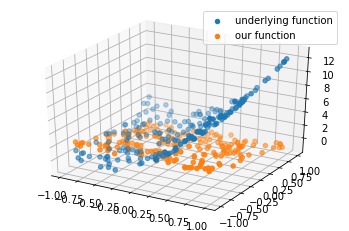

In [33]:
class Model:
  def __init__(self, input_dim, num_hidden):
    self.linear1 = Linear(input_dim, num_hidden)
    self.relu = Relu()
    self.linear2 = Linear(num_hidden, 1)
  
  def __call__(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2
  
  def backward(self, output_gradient):
    linear2_gradient = self.linear2.backward(output_gradient)
    relu_gradient = self.relu.backward(linear2_gradient)
    linear1_gradient = self.linear1.backward(relu_gradient)
    # print('Model backward', linear2_gradient.shape, relu_gradient.shape, linear1_gradient.shape)
    # import pdb; pdb.set_trace()
    return linear1_gradient

  def update(self, lr):
    self.linear2.update(lr)
    self.linear1.update(lr)

loss = MSE()
model = Model(d, 10)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
loss_gradient = loss.backward()
print(loss_value)
model.backward(loss_gradient)
plot_3d(x, y_true, y_pred)

In [34]:
# Test just one forward and backward step
loss = MSE()
model = Model(d, 10)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)
loss_gradient = loss.backward()
model.backward(loss_gradient)
model.update(0.1)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)

26.153134408165666
9.444455620513986


Epoch 0, loss 9.444455620513986
Epoch 1, loss 5.672125010051101
Epoch 2, loss 3.7584470616895156
Epoch 3, loss 2.7576189456723146
Epoch 4, loss 2.1201156154694676
Epoch 5, loss 1.6846686812311982
Epoch 6, loss 1.3814591208840077
Epoch 7, loss 1.163062755882571
Epoch 8, loss 1.0000070187224515
Epoch 9, loss 0.8742201248395395
Epoch 10, loss 0.776013131260745
Epoch 11, loss 0.6965482257448677
Epoch 12, loss 0.6296306890672366
Epoch 13, loss 0.5729681330986973
Epoch 14, loss 0.5242923022323714
Epoch 15, loss 0.48198197302910784
Epoch 16, loss 0.4448668503811594
Epoch 17, loss 0.41223438469021173
Epoch 18, loss 0.38340603337389967
Epoch 19, loss 0.357955044930223
Epoch 20, loss 0.33521093493811444
Epoch 21, loss 0.3149183833503488
Epoch 22, loss 0.29663963732482485
Epoch 23, loss 0.2803152776769703
Epoch 24, loss 0.26547127667303
Epoch 25, loss 0.25240592063188044
Epoch 26, loss 0.2408412562530008
Epoch 27, loss 0.2305017351516942
Epoch 28, loss 0.221467895215871
Epoch 29, loss 0.213332931

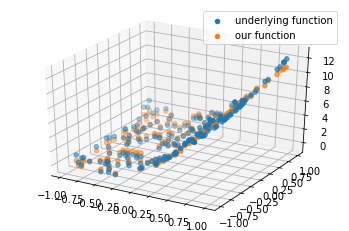

In [35]:
fit(x, y_true, model=model, loss=loss, lr=0.1, num_epochs=40)
plot_3d(x, y_true, model(x))

### Same thing, in PyTorch

In [36]:
import torch
import torch.nn as nn


class TorchModel(nn.Module):
  def __init__(self, input_dim, num_hidden):
    super().__init__()
    self.linear1 = nn.Linear(input_dim, num_hidden)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(num_hidden, 1)
  
  def forward(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2


loss = nn.MSELoss()
model = TorchModel(d, 10)
x_tensor = torch.tensor(x).float()
y_true_tensor = torch.tensor(y_true).float()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(17.9014, grad_fn=<MseLossBackward>)


In [37]:
# Test just one forward and backward step
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

optimizer.zero_grad()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)
loss_gradient = loss_value.backward()
optimizer.step()

y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(17.9014, grad_fn=<MseLossBackward>)
tensor(9.8338, grad_fn=<MseLossBackward>)


tensor(9.8338, grad_fn=<MseLossBackward>)
tensor(6.5582, grad_fn=<MseLossBackward>)
tensor(4.7461, grad_fn=<MseLossBackward>)
tensor(3.4539, grad_fn=<MseLossBackward>)
tensor(2.5992, grad_fn=<MseLossBackward>)
tensor(2.0226, grad_fn=<MseLossBackward>)
tensor(1.6221, grad_fn=<MseLossBackward>)
tensor(1.3418, grad_fn=<MseLossBackward>)
tensor(1.1315, grad_fn=<MseLossBackward>)
tensor(0.9708, grad_fn=<MseLossBackward>)
tensor(0.8483, grad_fn=<MseLossBackward>)
tensor(0.7508, grad_fn=<MseLossBackward>)
tensor(0.6740, grad_fn=<MseLossBackward>)
tensor(0.6129, grad_fn=<MseLossBackward>)
tensor(0.5641, grad_fn=<MseLossBackward>)
tensor(0.5233, grad_fn=<MseLossBackward>)
tensor(0.4887, grad_fn=<MseLossBackward>)
tensor(0.4598, grad_fn=<MseLossBackward>)
tensor(0.4352, grad_fn=<MseLossBackward>)
tensor(0.4130, grad_fn=<MseLossBackward>)
tensor(0.3930, grad_fn=<MseLossBackward>)
tensor(0.3752, grad_fn=<MseLossBackward>)
tensor(0.3589, grad_fn=<MseLossBackward>)
tensor(0.3441, grad_fn=<MseLossBac

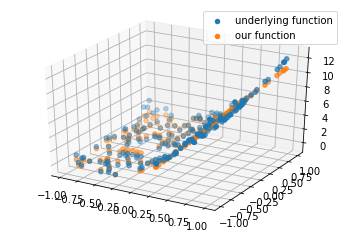

In [38]:
# Now we run the training loop

def torch_fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred_tensor = model(x_tensor)
    loss_value = loss(y_pred_tensor, y_true_tensor)
    print(loss_value)
    loss_value.backward()
    optimizer.step()

torch_fit(x_tensor, y_true_tensor, model=model, loss=loss, lr=0.1, num_epochs=40)
plot_3d(x, y_true, model(x_tensor).detach())

### Same thing, in Tensorflow/Keras

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                30        
_________________________________________________________________
regression (Dense)           (None, 1)                 11        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
7/7 [==============================] - 0s 2ms/step - loss: 13.8500
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 1.8062
Epoch 3/10
7/7 [==============================] - 0s 1ms/step - loss: 0.7932
Epoch 4/10
7/7 [==============================] - 0s 2ms/step - loss: 0.3996
Epoch 5/10
7/7 [==============================] - 0s 2ms/step - loss: 0.4353
Epoc

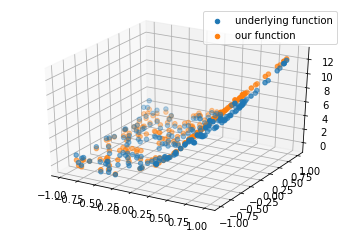

In [39]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers

inputs = keras.Input(shape=(2,))
l1 = layers.Dense(10, activation='relu', name='dense_1')(inputs)
outputs = layers.Dense(1, name='regression')(l1)

model = keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())
model.compile(loss='mse', optimizer=optimizers.SGD(0.1))

model.fit(x, y_true, epochs=10)

y_pred = model.predict(x)

plot_3d(x, y_true, model(x))